<img src="resources/cropped-SummerWorkshop_Header.png">  

<h1 align="center">Workshop SWDB 2024 </h1> 
<h3 align="center">Day 3 2024 - Neuron Morphology</h3> 
<h3 align="center">Notebook 1: Analyzing Brain Connectivity via Projections of Light Microscopy Neurons</h3> 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
# Section 1: Introduction

<font size="4"> The main objective of this notebook is to analyze the whole-brain connectivity of neurons imaged via Light Microscopy (LM). The neurons in this dataset are acquired by imaging the volume of an entire brain wherein a small number of cells are sparsely labelled, and then tracing the axons and dendrites of those cells to reconstruct their full morphologies. Neurons from several brains are integrated by aligning each sample to the Common Coordinate Framework (CCF: see databook). 
    
<font size="4"> Whereas Electron Microscopy (EM) densely reconstructs neuronal morphologies contained within a small volume of tissue, this LM dataset contains the brain-wde morphologies of sparsely sampled neurons (see Figure 1). LM neurons allow us to investigate how different brain regions communicate by analyzing the neurons or "output channels" by which information flows across the brain. However, unlike EM, this dataset does not show the specific connections between individual neurons. As with many aspects of neuroscience, there is a tradeoff between scale and resolution, and which dataset is best suited for your analysis often depends upon the scientific questions you're seeking to address.


<div style="text-align: center;">
    <img src='imgs/lm-vs-em.png' style="max-width: 65%; height: auto;">
</div>

<font size="4"><b> Figure 1:</b> LM neuron shown in blue and EM neuron shown in purple.

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<font size="4"> As an introduction to analyzing projections of LM neurons, we will explore three open-ended questions related to brain connectivity:

<font size="4"> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <strong>Question 1:</strong> What do the inputs to a particular brain region look like? </font>

<font size="4"> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <strong>Question 2:</strong>  Where else do those inputs send their collaterals?  </font>
    
<font size="4"> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <strong>Question 3:</strong> Are neuronal morphologies stereotyped, or are there distinct projection classes?

<font size="4"> These questions involve analyzing sets of neuronal morphologies to provide a general overview of how neurons connect different brain regions. Neurons integrate inputs at their somas and dendrites, then transmit their outputs via axons. In this tutorial, we'll define connectivity by the presence and number of axon terminals (also referred to as axonal endpoints). We'll refer to hypothetical brain region A being connected to region B if a neuron exists with somatic or dendritic compartments in A, and axon terminals in B. We'll address Question 1 by querying neurons with axon terminals in the mediodorsal nucleus of the thalamus (MD). Note that while each neuron in the LM dataset has been fully reconstructed, by no means does this dataset contain a comprehensive accounting of all neurons in all brain areas. Keep this in mind when formulating your future analyses - failing to observe a connection may reflect a lack of sampling rather than a true lack of connectivity. 
    
<font size="4"> Some neurons are quite focal in their projections (this is true of many neurons from primary thalamic nuclei), while others diffusely target several brain regions (this is often true of neurons in higher order thalamic nuclei). We'll follow up on Q1 by more closely examining several of the inputs to MD, and seeing where else their axon terminals ramify. This tells us about how information flows through the brain and which areas are receiving shared inputs.
    
<font size="4"> In Q1 and Q2 we'll look at the inputs to MD, but in Question 3 we'll turn to looking at the outputs of that nucleus. We'll use clustering approaches to ask: how many distinct output channels are there from MD? Some nuclei are monolithic and have very stereotyped patterns of connectivity, whereas other brain regions display discrete or continous variability in their projection targets. In addressing Questions 1 - 3, we'll learn something about the input and output structure of a multi-regional circuit, and in so doing learn skills that can be translated to future analyses in your group projects.

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
<font size="4"> **Brain Region Information:** In this notebook, we use a file 'adult_mouse_ccf_structures.csv' to query information from the CCF atlas. We can easily extract information about a brain region in the ccf atlas by using a routine called "get_ccf_property". This routine takes a ccf id and some property (e.g. name or acronym) as the inputs, then returns the corresponding information about that ccf id by reading from a pandas dataframe generated from 'adult_mouse_ccf_structures.csv'. Next, we'll provide some examples of using this routine.


<div style="text-align: center;">
    <img src='imgs/ccf.png' style="max-width: 65%; height: auto;">
</div>

In [1]:
import pandas as pd
from utils.ccf_utils import get_ccf_property
    

print("This is the contents of 'adult_mouse_ccf_structures.csv' which is stored as the dataframe...\n")
ccf_atlas = pd.read_csv('/data/adult_mouse_ccf_structures.csv')
ccf_atlas


This is the contents of 'adult_mouse_ccf_structures.csv' which is stored as the dataframe...



,id,name,acronym,hemisphere_id,parent_structure_id,graph_order,structure_id_path,color_hex_triplet
0,1000,extrapyramidal fiber systems,eps,3,1009.0,1218,/997/1009/1000/,CCCCCC
1,223,Arcuate hypothalamic nucleus,ARH,3,157.0,733,/997/8/343/1129/1097/157/223/,FF5D50
2,12998,"Somatosensory areas, layer 6b",SS6b,3,453.0,36,/997/8/567/688/695/315/453/12998/,188064
3,163,"Agranular insular area, posterior part, layer 2/3",AIp2/3,3,111.0,287,/997/8/567/688/695/315/95/111/163/,219866
4,552,"Pontine reticular nucleus, ventral part",PRNv,3,987.0,914,/997/8/343/1065/771/987/552/,FFBA86
...,...,...,...,...,...,...,...,...
1322,324,"Entorhinal area, medial part, ventral zone, la...",ENTmv2,3,934.0,519,/997/8/567/688/695/1089/822/909/934/324/,32B825
1323,321,Subgeniculate nucleus,SubG,3,1014.0,710,/997/8/343/1129/549/856/1014/321/,FF909F
1324,796,Dopaminergic A13 group,A13,3,797.0,803,/997/8/343/1129/1097/290/797/796/,F2483B
1325,436,columns of the fornix,fx,3,737.0,1252,/997/1009/991/768/1099/737/436/,CCCCCC


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<font size="4"> The ccf ids are stored as integers in a meshparty skeleton, so we'll use the function "get_ccf_name" to get the name of the region corresponding to a given id. Here is a simple example of using this function: </font>
    

In [2]:
# Report brain region
ccf_id = 223
ccf_name = get_ccf_property(ccf_atlas,ccf_id, "name")
ccf_acronym = get_ccf_property(ccf_atlas,ccf_id, "acronym")

print(f"The ccf_id '{ccf_id}' represents the '{ccf_name}'")
print(f"The '{ccf_name}' are abbreviated as '{ccf_acronym}'")


The ccf_id '223' represents the 'Arcuate hypothalamic nucleus'
The 'Arcuate hypothalamic nucleus' are abbreviated as 'ARH'


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
    
<font size="4"> This function also has an optional argument called "depth" that traverses the region hierarchy to return the name of the region name for the given depth. </font>

In [3]:
# Report hierarchy
depth = 5
ccf_name = get_ccf_property(ccf_atlas,ccf_id, "name", depth=depth)
ccf_acronym = get_ccf_property(ccf_atlas, ccf_id, "acronym", depth=depth)

print(f"The ccf_id '{ccf_id}' represents the '{ccf_name}'")
print(f"The '{ccf_name}' are abbreviated as '{ccf_acronym}'")


The ccf_id '223' represents the 'Periventricular zone'
The 'Periventricular zone' are abbreviated as 'PVZ'


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
# Section 2: Analyzing the Inputs to a Brain Region


<h3> Imports </h3>

In [4]:
from random import sample
from utils.ccf_utils import get_ccf_ids #, get_connectivity_matrix
from utils.skeleton_loading_utils import number_of_samples, load_lm_datasets, progress_bar

import matplotlib.pyplot as plt
import numpy as np
import skeleton_plot as skelplot
import seaborn as sns

%matplotlib inline


<h3> Load Dataset </h3>

In [5]:
skel_list = load_lm_datasets()

Loading datasets...
exaSPIM_609281_2022-11-03_13-49-18_reconstructions:  [==================================================] 25/25
exaSPIM_651324_2023-03-06_15-13-25_reconstructions:  [==================================================] 13/13
exaSPIM_653158_2023-06-01_20-41-38_reconstructions:  [==================================================] 42/42
exaSPIM_653980_2023-08-10_20-08-29_reconstructions:  [==================================================] 20/20
mouselight_reconstructions:  [==================================================] 1549/1549


In [6]:
len(skel_list)

1649

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

## Inputs/Outputs of a Single Neuron

<font size="4"> Our journey to understand how the brain is connected begins with analyzing how a single neuron connects different regions. The purpose of this elementary analysis is to introduce a set of routines that simplify querying information such as finding all neurons with somas in a certain ccf region. We'll begin by choosing a skeleton from our dataset and performing the following query:
        
<font size="4"><strong> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Query 1:</strong> Which brain regions do the dendritic or axonal endpoints of a given neuron reside in? </font>

<font size="4"> Each skeleton has a node-level attribute called "id" that specifies where a node is located in ccf space. We will use subroutine called "get_ccf_ids" which is stored in "ccf_utils.py". The purpose of this routine is to easily extract the ccf ids from vertices within a certain compartment (e.g. axons or dendrites) and/or vertices which are end points or branch points, see documentation for more details. Next, let's look at some simple examples of using the routine "get_ccf_ids" to determine what brain regions our skeleton passes through. </font>

In [7]:
# Choose a skeleton and look at it
skel = skel_list[-1] 


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<font size="4"><p><b>Exercise: </b> Plot this Neuron in 2D.
    
</div>

(2259756.0, 7098885.5, 5127843.0, 1159171.875)

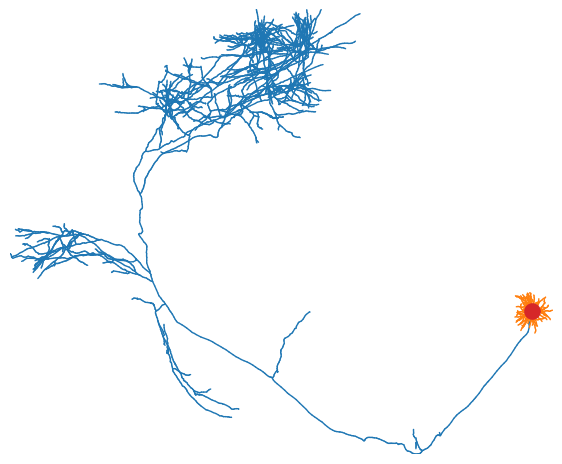

In [33]:
#Answer

f, ax = plt.subplots(figsize=(7, 10))
skelplot.plot_tools.plot_skel(
    skel,
    line_width=1,
    plot_soma=True,
    invert_y=True,
    pull_compartment_colors=True,
    skel_color_map={1: "tab:red", 2: "tab:blue", 3: "tab:ornage"},
    x="x",
    y="y",
)

ax.spines['right'].set_visible(False) 
ax.spines['left'].set_visible(False) 
ax.spines['top'].set_visible(False) 
ax.spines['bottom'].set_visible(False)
ax.axis('off')    


In [9]:
#Look in 3D with the CCF Atlas Mesh:

#Copied from Notebook 0:

import random

# Define plotting functions to turn a skeleton into line objects
def plot_graphs(graphs, plot, color = None):
    
    for i, g in enumerate(graphs):
        if color == None:
            colorstr = "%06x" % random.randint(0, 0xFFFFFF)
            c  = int(colorstr, 16) + 0x200
        elif type(color) == type([]):
            c = color[i]
        else:
            c = color
        g_lines = graph_to_lines(g,c)
        plot += g_lines
        

def graph_to_lines(g,color=None):
    # Extract vertex positions
    g_verts = g.vertices
    
    # Pairs of indices into the vertex array are edges
    g_inds = g.edges
    
    # Could add iteration here to plot compartments in different colors
    
    g_lines = k3d.factory.lines(g_verts, g_inds, indices_type='segment', width=1, shader='simple',color=color)
    return g_lines

import trimesh
import k3d

plot = k3d.plot()
plot_graphs([skel], plot)


with open("/data/AllenCCFMesh/MouseBrainAllen3.obj") as f:
    ccf_mesh = trimesh.load(f, 'obj')


mesh = k3d.mesh(ccf_mesh.vertices*1000, ccf_mesh.faces, opacity = 0.2, color=808080)
plot += mesh
plot.display()

Output()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
<h3>Somas, Axons and Dendrites </h3>
    
<font size="4"> The compartment types defined at each vertex use the following convention:  
    
<font size="4"> <p> <b>Compartment label conventions</b> (from standardized swc files <a href="www.neuromorpho.org">www.neuromorpho.org</a>)
<ul>
<font size="4"><li> 0 - undefined
<font size="4"><li> 1 - soma
<font size="4"><li> 2 - axon
<font size="4"><li> 3 - (basal) dendrite
<font size="4"><li> 4 - apical dendrite
<font size="4"><li> 5+ - custom
</ul>
    
</div>

In [10]:
# Find the CCF Compartment of it's soma (root)
soma_ccf = get_ccf_ids(ccf_atlas,skel, compartment_type=1) 
print("Soma is in the", get_ccf_property(ccf_atlas, soma_ccf[0], "name"))

Soma is in the Suprageniculate nucleus


In [11]:
# Dendrite Endpoints - CCF Regions
dendrite_endpoints_ccf = get_ccf_ids(ccf_atlas, skel, compartment_type=3, vertex_type="end_points")

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<font size="4"><p><b>Exercise: </b> Find Axonal End Points for this neuron
    
</div>

In [12]:
#Answer

# Axon Endpoints - CCF Regions
axon_endpoints_ccf = get_ccf_ids(ccf_atlas, skel, compartment_type=2, vertex_type="end_points")

In [13]:
# Reporting Distributions 
def report_distribution(values, cnt_threshold=0, percent_threshold=0, return_counts=False):
    ids, cnts = np.unique(values, return_counts=True)
    stat_symbol = "#" if return_counts else "%"
    item = "Neurons" if return_counts else "Vertices"
    print(f"{stat_symbol} {item}   CCF Region")
    for idx in np.argsort(-cnts):
        percent = 100 * cnts[idx] / len(values)
        ccf_id = get_ccf_property(ccf_atlas, ids[idx], "name")
        if percent >= percent_threshold and cnts[idx] > cnt_threshold:
            value = cnts[idx] if return_counts else round(percent, 3)
            print(f"{value}      {ccf_id}")

print("\nDistribution of CCF Regions of Dendritic Endpoints...")
report_distribution(dendrite_endpoints_ccf, percent_threshold=1)

print("\nDistribution of CCF Regions of Axonal Endpoints...")
report_distribution(axon_endpoints_ccf, percent_threshold=1)


Distribution of CCF Regions of Dendritic Endpoints...
% Vertices   CCF Region
53.226      Suprageniculate nucleus
25.806      Medial geniculate complex, dorsal part
11.29      Medial geniculate complex, medial part
3.226      brachium of the inferior colliculus
3.226      Thalamus
1.613      Midbrain
1.613      root

Distribution of CCF Regions of Axonal Endpoints...
% Vertices   CCF Region
44.413      Lateral amygdalar nucleus
12.607      Striatum
8.596      Caudoputamen
8.023      amygdalar capsule
4.298      Temporal association areas, layer 2/3
3.725      Temporal association areas, layer 5
2.865      Temporal association areas, layer 1
2.579      internal capsule
2.292      Ectorhinal area/Layer 2/3
1.719      fiber tracts
1.433      Central amygdalar nucleus, capsular part
1.433      Globus pallidus, external segment


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<font size="4">Note: You may encounter a neuron that passes through "nan" or some integer valued region which are not valid ccf regions. This discrepancy is caused by minor misalignments of the brain sample to the ccf template caused during registration or if some parts of the neuron are outside the CCF atlas.</font>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

## Inputs to a Brain Region
    
<font size="4"> Next we'll analyze the inputs to a brain region by choosing a brain region and performing the following queries: </font>

    
<font size="4"><strong> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Query 1:</strong> Find all neurons with axon endpoints in a given brain region. </font>
    
<font size="4"><strong> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Query 2:</strong> Given these neurons, what regions do these neurons have dendritic endpoints? </font>  


In [14]:
# -- Query 1 --

# Initializations
target_ccf_id = 362
target_acronym = get_ccf_property(ccf_atlas, target_ccf_id, "acronym")
target_name = get_ccf_property(ccf_atlas, target_ccf_id, "name")
print(target_name, target_acronym)


Mediodorsal nucleus of thalamus MD


In [15]:
# Run Search
print(f"Searching for Skeletons with Axon Endpoints in the {target_name}...")
skels_subset = []
for i, skel in enumerate(skel_list):
    progress_bar(i + 1, len(skel_list))
    if target_ccf_id in set(get_ccf_ids(ccf_atlas, skel, compartment_type=2)):
        skels_subset.append(skel)

print("\n# Skeletons Found:", len(skels_subset))

Searching for Skeletons with Axon Endpoints in the Mediodorsal nucleus of thalamus...
[==================================================] 1649/1649
# Skeletons Found: 212


In [16]:
#Let's look at all these neurons
import trimesh
import k3d

plot = k3d.plot()
plot_graphs(skels_subset, plot)


with open("/data/AllenCCFMesh/MouseBrainAllen3.obj") as f:
    ccf_mesh = trimesh.load(f, 'obj')


mesh = k3d.mesh(ccf_mesh.vertices*1000, ccf_mesh.faces, opacity = 0.2, color=808080)
plot += mesh
plot.display()

Output()

In [17]:
# -- Query 2 --
#Given these neurons, what regions do these neurons have dendritic endpoints? Where are they collecting information from?
# Get regions
ccf_ids_list = list()
for skel in skels_subset:
    ccf_ids_list.extend(
        get_ccf_ids(ccf_atlas, 
            skel,
            compartment_type=3,
            vertex_type="end_points",
        )
    )

# Filter regions
ccf_ids, cnts = np.unique(ccf_ids_list, return_counts=True)
ccf_ids = ccf_ids[cnts > 10]
cnts = cnts[cnts > 10]

print("# Distinct Regions Found:", len(ccf_ids))

# Distinct Regions Found: 82


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">


<font size='4'> To finish answering what the inputs to a brain region look like, let's generate a bar plot of the brain regions that we queried.

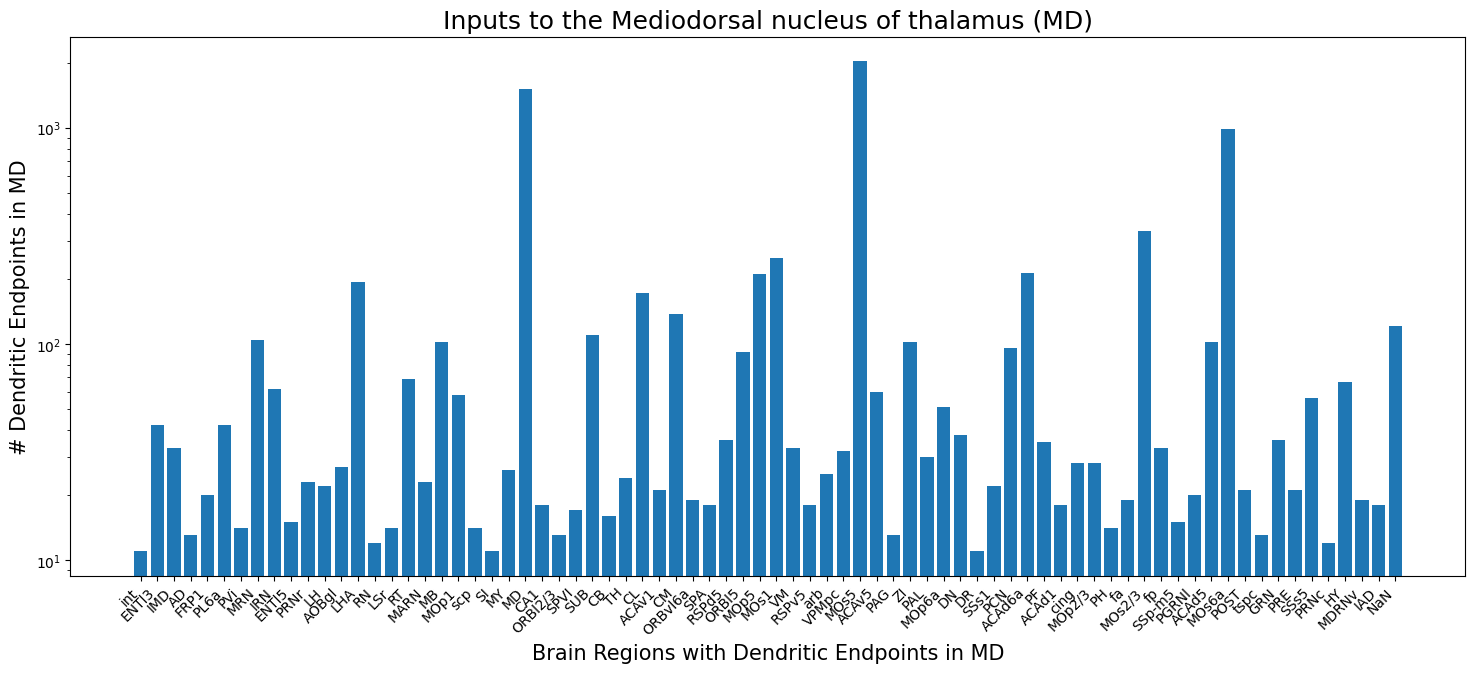

In [18]:
# Get brain region names
ccf_names = list()
for ccf_id in ccf_ids:
    acronym = get_ccf_property(ccf_atlas, ccf_id, "acronym")
    if type(acronym) is not str:
        get_ccf_property(ccf_id, "acronym", print_id=True)
    ccf_names.append( "NaN" if type(acronym) is not str else acronym)

# Make plot
plt.figure(figsize=(18, 7))
plt.bar(ccf_names, cnts)
plt.xticks(rotation=45, ha='right')
plt.yscale('log')

# Add titles and labels
plt.title("Inputs to the " + target_name + f" ({target_acronym})", fontsize=18)
plt.xlabel("Brain Regions with Dendritic Endpoints in " + target_acronym, fontsize=15)
plt.ylabel("# Dendritic Endpoints in " + target_acronym, fontsize=15)

# Show the plot
plt.show()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">


<font size='4'> Lastly, we will visualize the inputs to brain region by plotting all of these neurons by coloring it by the location of its soma (which ccf region it lies in).
    

In [19]:

import trimesh
import k3d

ccf_ids_list = list()
for skel in skels_subset:
    ccf_ids_list.extend(
        get_ccf_ids(ccf_atlas,
            skel,
            compartment_type=1           
        )
    )
int_list = [int(i) for i in ccf_ids_list] #can't use this becausee it has very large numbers

#map this to a set of colors

unique_numbers = np.unique(int_list)
unique_colors = list()

mapper = {}
for i in unique_numbers:
    colorstr = "%06x" % random.randint(0, 0xFFFFFF)
    c  = int(colorstr, 16) + 0x200
    mapper[i] = c

colors_list = [c for c in map(mapper.get, int_list)]
print(colors_list)

[4454648, 16173753, 13126334, 15012763, 15012763, 15012763, 15012763, 15012763, 6081045, 15012763, 15012763, 15012763, 1780563, 14487498, 9107524, 15012763, 9107524, 13767565, 2261821, 6364867, 13126334, 2261821, 9107524, 5973280, 14487498, 2961276, 9107524, 14900607, 9107524, 12233349, 6630996, 1328113, 8176749, 14487498, 12183597, 9107524, 228344, 13767565, 2040132, 9107524, 228344, 14487498, 8783240, 9939035, 2040132, 2261821, 14487498, 9847019, 15205759, 9107524, 4215155, 9732371, 9356422, 9107524, 16298036, 6630996, 9107524, 14487498, 12233349, 15012763, 14487498, 14487498, 9107524, 9107524, 10914202, 9107524, 12233349, 13767565, 9107524, 13126334, 14487498, 9107524, 9107524, 14487498, 16056535, 13767565, 3082567, 9107524, 15012763, 12233349, 8211166, 3070341, 8794869, 9107524, 15012763, 9107524, 9107524, 15012763, 9107524, 2261821, 9107524, 9107524, 16056535, 9107524, 14487498, 8849399, 2726567, 14487498, 2261821, 2040132, 9107524, 9025754, 14487498, 14487498, 2726567, 9107524, 1

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<font size="4"><p><b>Exercise: </b> Visualize the cells colored by which region their soma lies in 3D with the CCF mesh. How is this different from the previous plot?
    
</div>

In [20]:
#Answer
plot = k3d.plot()
plot_graphs(skels_subset, plot, color = colors_list)


with open("/data/AllenCCFMesh/MouseBrainAllen3.obj") as f:
    ccf_mesh = trimesh.load(f, 'obj')


mesh = k3d.mesh(ccf_mesh.vertices*1000, ccf_mesh.faces, opacity = 0.2, color=808080)
plot += mesh
plot.display()

Output()

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<font size="4"><p><b>Exercise: </b> Redo this at a CCF depth of 3. How does this look different?
    
</div>

In [21]:
import trimesh
import k3d

ccf_ids_list = list()
for skel in skels_subset:
    ccf_ids_list.extend(
        get_ccf_ids(
            ccf_atlas,
            skel,
            compartment_type=1, depth=3           
        )
    )
int_list = [int(i) for i in ccf_ids_list]  #can't use this becausee it has very large numbers

#map this to a set of colors

unique_numbers = np.unique(int_list)
unique_colors = list()

mapper = {}
for i in unique_numbers:
    colorstr = "%06x" % random.randint(0, 0xFFFFFF)
    c  = int(colorstr, 16) + 0x200
    mapper[i] = c

colors_list = [c for c in map(mapper.get, int_list)]
print(colors_list)

plot = k3d.plot()
plot_graphs(skels_subset, plot, color = colors_list)


with open("/data/AllenCCFMesh/MouseBrainAllen3.obj") as f:
    ccf_mesh = trimesh.load(f, 'obj')


mesh = k3d.mesh(ccf_mesh.vertices*1000, ccf_mesh.faces, opacity = 0.2, color=808080)
plot += mesh
plot.display()

[16108398, 16108398, 2697427, 2697427, 2697427, 2697427, 2697427, 2697427, 2697427, 2697427, 2697427, 2697427, 11373323, 15927021, 15927021, 2697427, 15927021, 3258084, 15927021, 16108398, 2697427, 15927021, 15927021, 6936195, 15927021, 11373323, 15927021, 15927021, 15927021, 2697427, 11609094, 16108398, 2697427, 15927021, 2340859, 15927021, 16621382, 3258084, 15927021, 15927021, 16621382, 15927021, 6237051, 15927021, 15927021, 15927021, 15927021, 2697427, 2697427, 15927021, 4623918, 2697427, 15927021, 15927021, 2697427, 11609094, 15927021, 15927021, 2697427, 2697427, 15927021, 15927021, 15927021, 15927021, 15927021, 15927021, 2697427, 3258084, 15927021, 2697427, 15927021, 15927021, 15927021, 15927021, 16108398, 3258084, 2697427, 15927021, 2697427, 2697427, 15927021, 2697427, 15927021, 15927021, 2697427, 15927021, 15927021, 2697427, 15927021, 15927021, 15927021, 15927021, 16108398, 15927021, 15927021, 15927021, 3258084, 15927021, 15927021, 15927021, 15927021, 15927021, 15927021, 159270

Output()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
# Section 3: Analyzing Divergent Information Flow
    
<font size='4'> We've just looked at how inputs from different brain areas converge upon the Mediodorsal Nucleus of Thalamus (MD). However neurons are not exclusive in their projections, and a given cell will often have branching axonal fields targeting multiple different brain areas. We can learn about how information flows through the brain by looking at what input channels are shared between brain regions. Phrased another way, which brain areas are targeted by distinct collaterals of the same neuron?
    
<font size="4"> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <strong>Question 2:</strong>  Where else do inputs to MD send their collaterals?  </font>


In [22]:
# Here we are setting up a lookup dictionary between CCF IDs and region acronyms. Some neurons have a small number of vertices with
# unrecognized IDs due to registration errors / differences in CCF versioning. Here we're using a default dict to set unrecognized
# IDs to a default value of NaN.
from collections import defaultdict
#id_to_acronym = defaultdict(lambda: "NaN", ccf_atlas["acronym"].to_dict())
id_to_acronym = defaultdict(lambda: "NaN")
for i in ccf_atlas.id:
    id_to_acronym[i] = get_ccf_property(ccf_atlas,i, "acronym")

acronym_to_id = {acronym: ccf_id for ccf_id, acronym in id_to_acronym.items()}

## Pick a random Neuron from the set of Neurons that send information to MD
skel = skels_subset[100]

In [23]:
# Find the axon endpoints for our neuron and count how many terminate in each CCF region
axon_endpoints_ccf = get_ccf_ids(ccf_atlas,skel, compartment_type=2, vertex_type="end_points")
ids, cnts = np.unique(axon_endpoints_ccf, return_counts=True)


In [24]:
# Convert IDs to CCF acronyms for plotting purposes
endpoint_dataframe = pd.DataFrame({"CCF": [id_to_acronym[ccf_id] for ccf_id in ids], "Counts":cnts})



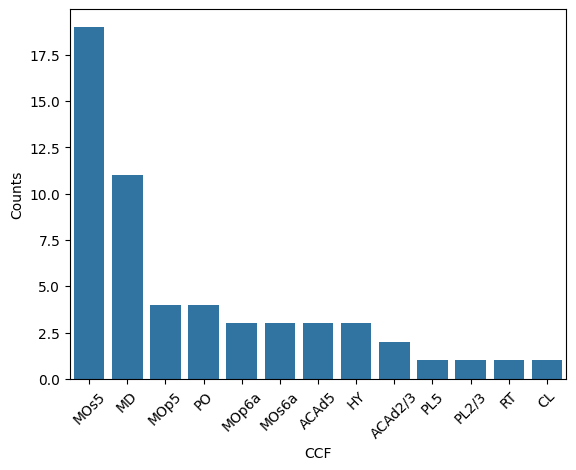

In [25]:
# Plot the axonal endpoints of our selected neuron
sns.barplot(endpoint_dataframe.sort_values("Counts", ascending = False).head(20),x = "CCF",y = "Counts")
plt.xticks(rotation=45);


In [26]:
# Plot the full neuronal morphology 
plot = k3d.plot()
plot_graphs([skel], plot)
plot += mesh
plot.display()

Output()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
# Section 4: Analyzing divergent information flow : Population Study
    
<font size='4'> We've now looked at a few of the diverse inputs to MD. How is this information integrated and distributed to the rest of the brain? Physiological experiments are best suited for interrogating how information is transformed across synapses. However morphological analysis can cue us into the output channels of the MD circuit. Do all MD neurons uniformly target the same brain structures, or is there diversity in their projection patterns? One way to formalize this question is with clustering analysis.
    
<font size="4"> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <strong>Question 3:</strong> Are neuronal morphologies stereotyped, or are there distinct projection classes?


In [27]:
# imports
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [28]:
# Grab neurons with somas in MD.
list_of_regions = ["MD"]
ccf_id = 362
ccf_id_list = [acronym_to_id[region] for region in list_of_regions]
skels_subset = [skel for skel in skel_list if skel.vertex_properties['ccf'][skel.root] == ccf_id]
print(f"# Skeletons with somas in {list_of_regions}:", len(skels_subset))


# Skeletons with somas in ['MD']: 21


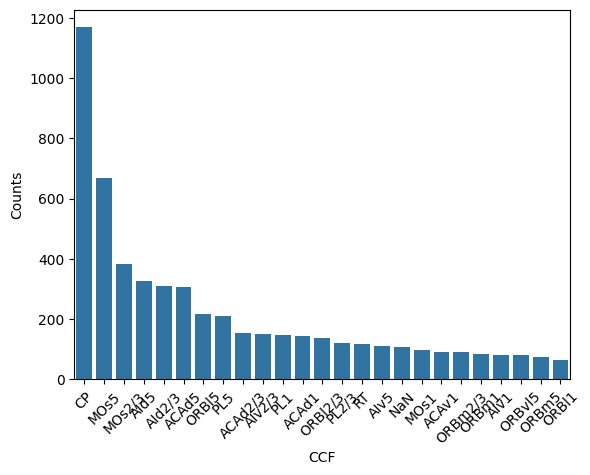

In [29]:

# First lets look at the projection targets of our population of neurons. We'll collect CCF endpoints:
axon_endpoints_ccf = list()
for skel in skels_subset:
    axon_endpoints_ccf.extend(get_ccf_ids(ccf_atlas, skel, compartment_type=2, vertex_type="end_points"))

axon_endpoints_ccf = [x for x in axon_endpoints_ccf if ~np.isnan(x)]

# Then we'll plot the total axonal endpoints of our population of neurons. To reduce visual clutter, we'll only plot the top 25 most targeted CCF structures.
number_of_structures_to_plot = 25
ids, cnts = np.unique(axon_endpoints_ccf, return_counts=True)
total_endpoints = pd.DataFrame({"CCF": [id_to_acronym[ccf_id] for ccf_id in ids], "Counts":cnts})
sns.barplot(total_endpoints.sort_values("Counts", ascending = False).head(number_of_structures_to_plot),x = "CCF",y = "Counts")
plt.xticks(rotation=45);

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<font size="4"><p><b>Question :</b> What are the most targeted brain regions by MD neurons? Does this change with the level of the CCF hierarchy that you're examining? 
    
Exercise: Plot the top 5 structures when axonal endpoints are queried at CCF depth 5.
    
</div>

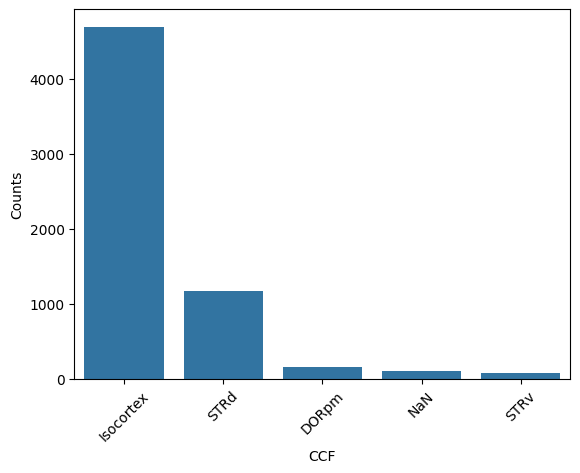

In [35]:
## Answer 
## (the point of this exercise is that dorsal striatum (or caudoputamen, CP above) might appear to be the most targeted structure 
## at the full depth level, but actually there are many many more cortical projections, they're just distributed between different
## regions of the isocortex

#re-run the code above with a new depth and number_of_structures_to_plot. both changes highlighted with comments below
axon_endpoints_ccf = list()
for skel in skels_subset:
    axon_endpoints_ccf.extend(get_ccf_ids(ccf_atlas, skel, compartment_type=2, vertex_type="end_points", depth=5)) ### depth here

number_of_structures_to_plot = 5 ### number of structures here
ids, cnts = np.unique(axon_endpoints_ccf, return_counts=True)
total_endpoints = pd.DataFrame({"CCF": [id_to_acronym[ccf_id] for ccf_id in ids], "Counts":cnts})
sns.barplot(total_endpoints.sort_values("Counts", ascending = False).head(number_of_structures_to_plot),x = "CCF",y = "Counts")
plt.xticks(rotation=45);

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">


<font size='4'> Next, let's try some simple clustering approaches to look at the diversity of our MD projections. We'll start by assembling a feature matrix where the rows are MD neurons and the columns are number of axonal endpoints in different CCF regions. You can imagine that other more exotic morphometric or topological features might have great descriptive power for distinguishing morphologies, but we'll keep things relatively simple for now.</font>
    

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">


<font size='4'> Create a dictionary of each cell's axonal endpoints. We'll then convert this to a dataframe to allow for visualizations and clustering.</font>
    

In [37]:
skel_dict = {}

# Collect axon endpoints from every cell in our subset
for i, skel in enumerate(skels_subset):
    axon_endpoints_ccf = get_ccf_ids(ccf_atlas, skel, compartment_type=2, vertex_type="end_points")
    ids, cnts = np.unique(axon_endpoints_ccf, return_counts=True) # Count incidence of each terminal structure
    skel_dict[i] = dict(zip(ids,cnts)) # Bundle up CCF region IDs and counts for each cell
    


In [38]:
# Convert to dataframe, and remap column names from region IDs to region acronyms
df = pd.DataFrame.from_dict(skel_dict, orient='index').fillna(0)
df = df.loc[:, df.columns.isin(id_to_acronym.keys())]
df = df.rename(columns = id_to_acronym)
df = df.loc[:, df.columns != "NaN"] # remove any unrecognized CCF regions

In [39]:
# We can optionally trim our feature matrix to only include CCF regions that comprise a decent fraction of our total terminal endpoints across
# the population. Let's do so for now to reduce bloat in our visualizations, setting a threshold of at least 0.05% of the total endpoints.
trim_df = True
threshold = 0.0005

if trim_df:
    total_counts = df.sum(axis=0, numeric_only=True)
    cumsum = total_counts / sum(total_counts)
    keep_cols = cumsum > threshold
    df = df.loc[:,keep_cols]

<Axes: >

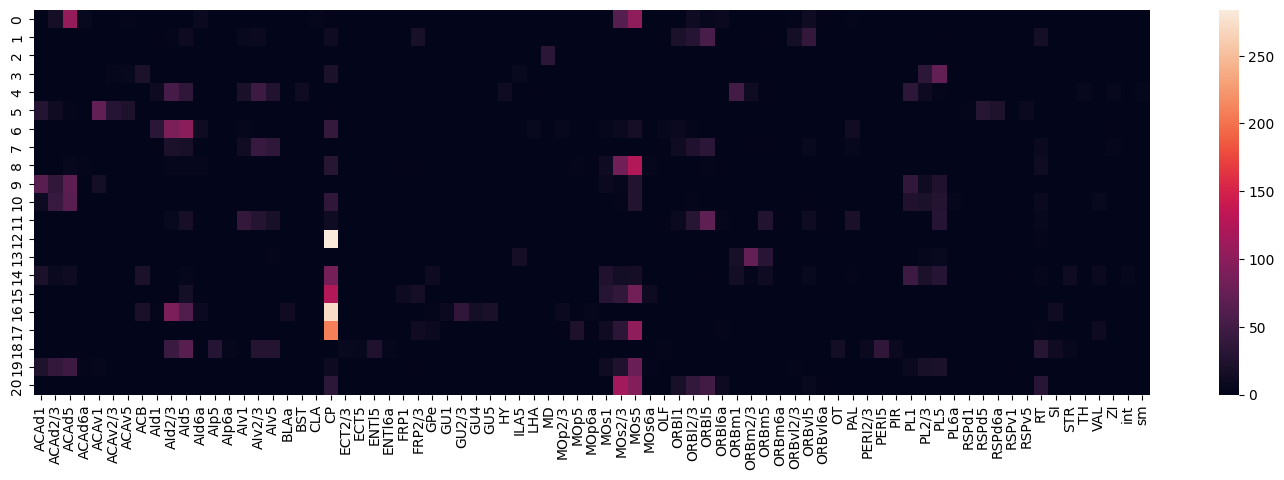

In [40]:
# Now lets visualize our feature matrix. We'll sort our columns to tidy up the visualization.
sorted_columns = sorted(df.columns)
df = df[sorted_columns] # Reorder the DataFrame based on sorted column names

plt.figure(figsize=(18,5))
sns.heatmap(df.sort_index())

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">


<font size='4'> Now, we'll employ a general purpose clustering algorithim called K Means to automatically group neurons based on their projection properties. You can learn more here: https://scikit-learn.org/stable/modules/clustering.html#k-means. K Means requires specifying a number of output clusters a priori. We'll start with 3 clusters, and dig into more principled approaches for selecting this number later. </font>
    

In [41]:
n_clusters = 3

# Initialize the KMeans model
kmeans = KMeans(n_clusters=n_clusters, n_init = "auto", random_state = 0)
kmeans.fit(df)

# Get the cluster labels
labels = kmeans.labels_

# We'll createa copy of our dataframe and add the cluster labels
df_clustered = df.copy()
df_clustered['cluster'] = labels

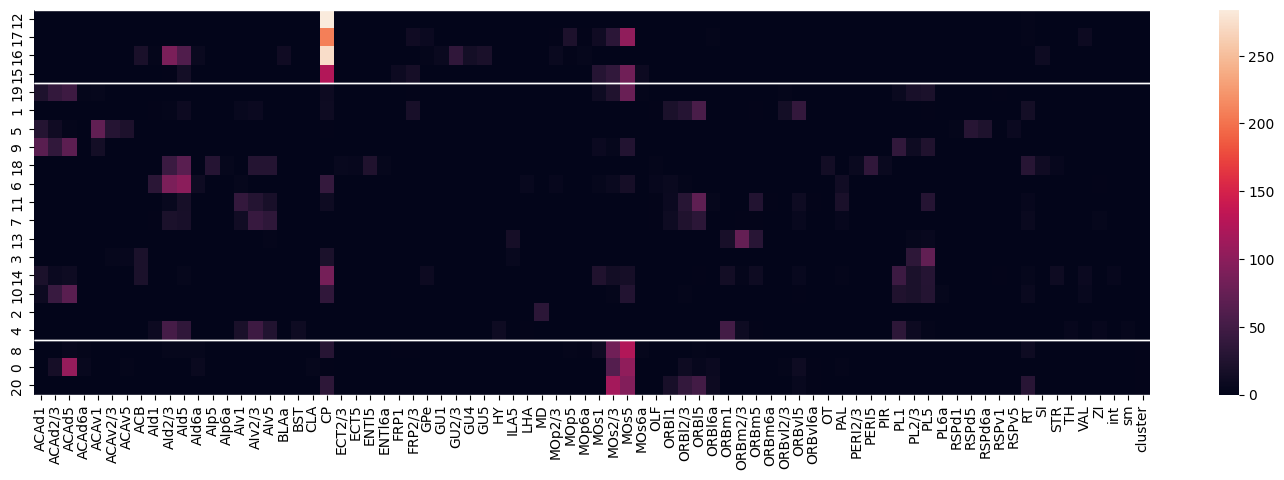

In [42]:
# Now lets visualize our clustering results.
df_clustered = df_clustered.sort_values("cluster") # sort by cluster label to organize plot

# Plot the heatmap
plt.figure(figsize=(18, 5))
sns.heatmap(df_clustered,  xticklabels=True)

# Outline clusters by adding lines
unique_clusters = df_clustered['cluster'].unique()
for cluster in unique_clusters:
    idx = np.where(df_clustered['cluster'] == cluster)[0]
    plt.hlines([min(idx), max(idx) + 1], *plt.xlim(), colors='white', linewidth=1)

In [43]:
# Let's also print the top structures targeted by each cluster.
top_regions = slice(0,3,1) # we'll specify that we want to look at the top 3 CCF regions
cluster_means = df_clustered.groupby("cluster").mean()
for i in range(len(cluster_means)):
    sorted_cluster_means = cluster_means.iloc[i,:].sort_values(ascending=False)
    output = ', '.join(f'({index}: {value:.{1}f})' for index, value in sorted_cluster_means[top_regions].items())
    print("Cluster #" + f"{i} top targets: " + output)

Cluster #0 top targets: (CP: 222.5), (MOs5: 46.2), (AId2/3: 22.5)
Cluster #1 top targets: (AId5: 17.8), (AId2/3: 15.4), (CP: 15.3)
Cluster #2 top targets: (MOs5: 107.3), (MOs2/3: 87.0), (ACAd5: 37.0)


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<font size="4"><p><b>Exercise: </b> Our feature matrix is a reduced representation of the original data. Let's check if our clustering makes sense by inspecting the morphologies belonging to a given cluster. Plot all of the neurons belonging to cluster 0 below.
    
</div>

In [44]:
#Answer
cluster_to_plot = 0
plot = k3d.plot()

sks = []
for skel in [skels_subset[i] for i in np.where(df_clustered["cluster"] == cluster_to_plot)[0]]:
    sks.append(skel)
plot_graphs(sks, plot)


mesh = k3d.mesh(ccf_mesh.vertices*1000, ccf_mesh.faces, opacity = 0.2, color=808080)
plot += mesh
plot.display()

Output()

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<font size="4"><p><b>Exercise:</b> K Means clustering requires specifying a number of K clusters to split your samples into a priori. However we rarely know in advance how many groups our data should be split into, and above we've chosen to specify 3 clusters somewhat arbitrarily. There isn't a definitive and absolute answer to the appropriate number of clusters to specify, but there are tools we can use to guide our selection of K. One tool is a metric called the silhouette score (https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py), which quantifies the proximity of points within clusters relative to points outside that cluster. Silhouette scores near 1 indicate clusters are very distinct, while values closer to 0 indicate points are close to the boundaries between clusters. 
    
Let's compare K Means Silhouette scores for different numbers of K. We've laid out some code to get you started below. Afterward, visualize and examine the clustering results for a few different values of K. Remember that Silhouette scores are only a tool to guide our selection of K, but are not the ultimate determinants of biological "truth".
</div>

In [45]:
## Guide
range_n_clusters = range(2, 15)
silhouette_avg = []

for k in range_n_clusters:
    # Code here!
    
    
    silhouette_avg.append(silhouette_score(df, cluster_labels))

# Plotting silhouette
plt.figure(figsize=(10, 4))
plt.plot(range_n_clusters, silhouette_avg, 'o-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Selection of K clusters')

NameError: name 'cluster_labels' is not defined

Text(0.5, 1.0, 'Selection of K clusters')

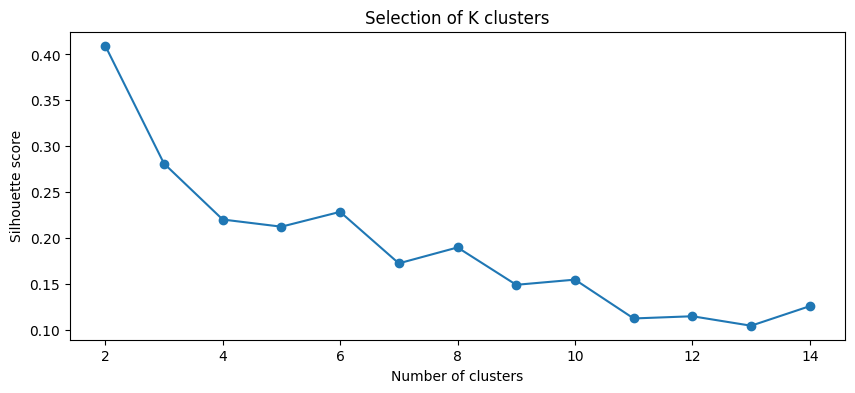

In [46]:
## Answer
range_n_clusters = range(2, 15)
silhouette_avg = []

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, n_init = "auto",  random_state = 0)
    cluster_labels = kmeans.fit_predict(df)
    silhouette_avg.append(silhouette_score(df, cluster_labels))

# Plotting silhouette
plt.figure(figsize=(10, 4))
plt.plot(range_n_clusters, silhouette_avg, 'o-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Selection of K clusters')